## accident heatmap
accident heat map per year. overlayed with citibike stations.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
#Einlesen der Unfall Daten von NYC
table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")

table_accidents

C:\Users\tzach\AppData\Local\Temp\ipykernel_21304\1767602452.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162654,03/15/2025,0:00,MANHATTAN,10011.0,40.737858,-73.996704,"(40.737858, -73.996704)",NaN,NaN,541 AVENUE OF THE AMERICAS,...,Unspecified,NaN,NaN,NaN,4799150,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2162655,03/15/2025,14:08,NaN,NaN,40.623123,-74.167595,"(40.623123, -74.167595)",LISK AVE,SOUTH AVE,NaN,...,Unspecified,NaN,NaN,NaN,4799203,Taxi,Pick-up Truck,NaN,NaN,NaN
2162656,03/15/2025,10:09,NaN,NaN,40.787760,-73.791370,"(40.78776, -73.79137)",CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4798984,Sedan,NaN,NaN,NaN,NaN
2162657,03/15/2025,17:30,QUEENS,11373.0,40.746740,-73.883640,"(40.74674, -73.88364)",NaN,NaN,40-31 82 ST,...,Unspecified,NaN,NaN,NaN,4799434,Sedan,Sedan,NaN,NaN,NaN


In [3]:
year = 2024

table_accidents["CRASH DATE"]= pd.to_datetime(table_accidents["CRASH DATE"])
table_accidents_year = table_accidents[table_accidents["CRASH DATE"].dt.year == year]
table_accidents_year

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1230,2024-09-13,14:20,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,4761583,Sedan,Pick-up Truck,NaN,NaN,NaN
1925,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",BELT PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761266,Bike,E-Bike,NaN,NaN,NaN
2991,2024-10-05,13:43,NaN,NaN,NaN,NaN,NaN,MENAHAN STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761112,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3797,2024-10-04,6:05,NaN,NaN,NaN,NaN,NaN,WESTCHESTER SQUARE,NaN,NaN,...,NaN,NaN,NaN,NaN,4761546,Sedan,NaN,NaN,NaN,NaN
4722,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4757494,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161591,2024-11-23,1:18,BROOKLYN,11207.0,40.688744,-73.908745,"(40.688744, -73.908745)",CENTRAL AVE,SCHAEFER ST,NaN,...,Unspecified,NaN,NaN,NaN,4798519,Sedan,NaN,NaN,NaN,NaN
2161697,2024-10-31,1:25,BROOKLYN,11207.0,40.687080,-73.913895,"(40.68708, -73.913895)",BUSHWICK AVE,HALSEY ST,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4798441,Moped,NaN,NaN,NaN,NaN
2161860,2024-12-02,10:12,MANHATTAN,10018.0,40.752853,-73.992980,"(40.752853, -73.99298)",8 AVE,W 35 ST,NaN,...,NaN,NaN,NaN,NaN,4798999,NaN,NaN,NaN,NaN,NaN
2161893,2024-12-22,19:15,BROOKLYN,11237.0,40.698536,-73.917870,"(40.698536, -73.91787)",BLEECKER ST,KNICKERBOCKER AVE,NaN,...,Unspecified,NaN,NaN,NaN,4798545,Bike,NaN,NaN,NaN,NaN


In [4]:
# remove latitude zero rows and nan
table_accidents_year = table_accidents_year[table_accidents_year['LATITUDE'] > 0]
table_accidents_year

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1925,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",BELT PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761266,Bike,E-Bike,NaN,NaN,NaN
4722,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4757494,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
10589,2024-02-02,8:40,NaN,NaN,40.651268,-73.971810,"(40.651268, -73.97181)",PARK CIRCLE,NaN,NaN,...,NaN,NaN,NaN,NaN,4699637,Sedan,NaN,NaN,NaN,NaN
10592,2024-04-27,21:00,BRONX,10459.0,40.824760,-73.893880,"(40.82476, -73.89388)",NaN,NaN,1036 FOX STREET,...,NaN,NaN,NaN,NaN,4721649,Taxi,NaN,NaN,NaN,NaN
10775,2024-05-01,21:40,NaN,NaN,40.825030,-73.931220,"(40.82503, -73.93122)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4721677,Tanker,PICK-UP,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161591,2024-11-23,1:18,BROOKLYN,11207.0,40.688744,-73.908745,"(40.688744, -73.908745)",CENTRAL AVE,SCHAEFER ST,NaN,...,Unspecified,NaN,NaN,NaN,4798519,Sedan,NaN,NaN,NaN,NaN
2161697,2024-10-31,1:25,BROOKLYN,11207.0,40.687080,-73.913895,"(40.68708, -73.913895)",BUSHWICK AVE,HALSEY ST,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4798441,Moped,NaN,NaN,NaN,NaN
2161860,2024-12-02,10:12,MANHATTAN,10018.0,40.752853,-73.992980,"(40.752853, -73.99298)",8 AVE,W 35 ST,NaN,...,NaN,NaN,NaN,NaN,4798999,NaN,NaN,NaN,NaN,NaN
2161893,2024-12-22,19:15,BROOKLYN,11237.0,40.698536,-73.917870,"(40.698536, -73.91787)",BLEECKER ST,KNICKERBOCKER AVE,NaN,...,Unspecified,NaN,NaN,NaN,4798545,Bike,NaN,NaN,NaN,NaN


In [5]:
def roundPartial (value, resolution):
    return round (value / resolution) * resolution

In [6]:
# define a grid by rounding and then count accidents in it...
table_accidents_year['LATITUDE ROUNDED'] = np.round(table_accidents_year.LATITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
table_accidents_year['LONGITUDE ROUNDED'] = np.round(table_accidents_year.LONGITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
table_accidents_year['LOCATION ROUNDED'] = table_accidents_year['LATITUDE ROUNDED'].astype(str) + ' ' + table_accidents_year['LONGITUDE ROUNDED'].astype(str) 
table_accidents_year

C:\Users\tzach\AppData\Local\Temp\ipykernel_21304\4256200890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_accidents_year['LATITUDE ROUNDED'] = np.round(table_accidents_year.LATITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
C:\Users\tzach\AppData\Local\Temp\ipykernel_21304\4256200890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_accidents_year['LONGITUDE ROUNDED'] = np.round(table_accidents_year.LONGITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
C:\Users\tzach\App

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LATITUDE ROUNDED,LONGITUDE ROUNDED,LOCATION ROUNDED
1925,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",BELT PARKWAY,NaN,NaN,...,NaN,4761266,Bike,E-Bike,NaN,NaN,NaN,40.645,-73.875,40.645 -73.875
4722,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,NaN,4757494,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,40.750,-73.760,40.75 -73.76
10589,2024-02-02,8:40,NaN,NaN,40.651268,-73.971810,"(40.651268, -73.97181)",PARK CIRCLE,NaN,NaN,...,NaN,4699637,Sedan,NaN,NaN,NaN,NaN,40.650,-73.970,40.65 -73.97
10592,2024-04-27,21:00,BRONX,10459.0,40.824760,-73.893880,"(40.82476, -73.89388)",NaN,NaN,1036 FOX STREET,...,NaN,4721649,Taxi,NaN,NaN,NaN,NaN,40.825,-73.895,40.825 -73.895
10775,2024-05-01,21:40,NaN,NaN,40.825030,-73.931220,"(40.82503, -73.93122)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,...,NaN,4721677,Tanker,PICK-UP,NaN,NaN,NaN,40.825,-73.930,40.825 -73.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161591,2024-11-23,1:18,BROOKLYN,11207.0,40.688744,-73.908745,"(40.688744, -73.908745)",CENTRAL AVE,SCHAEFER ST,NaN,...,NaN,4798519,Sedan,NaN,NaN,NaN,NaN,40.690,-73.910,40.69 -73.91
2161697,2024-10-31,1:25,BROOKLYN,11207.0,40.687080,-73.913895,"(40.68708, -73.913895)",BUSHWICK AVE,HALSEY ST,NaN,...,NaN,4798441,Moped,NaN,NaN,NaN,NaN,40.685,-73.915,40.685 -73.915
2161860,2024-12-02,10:12,MANHATTAN,10018.0,40.752853,-73.992980,"(40.752853, -73.99298)",8 AVE,W 35 ST,NaN,...,NaN,4798999,NaN,NaN,NaN,NaN,NaN,40.755,-73.995,40.755 -73.995
2161893,2024-12-22,19:15,BROOKLYN,11237.0,40.698536,-73.917870,"(40.698536, -73.91787)",BLEECKER ST,KNICKERBOCKER AVE,NaN,...,NaN,4798545,Bike,NaN,NaN,NaN,NaN,40.700,-73.920,40.7 -73.92


In [7]:
rcParams['figure.figsize'] = 11.7,8.27

### all accidents
cars, bicycles etc., using whole table for a year.

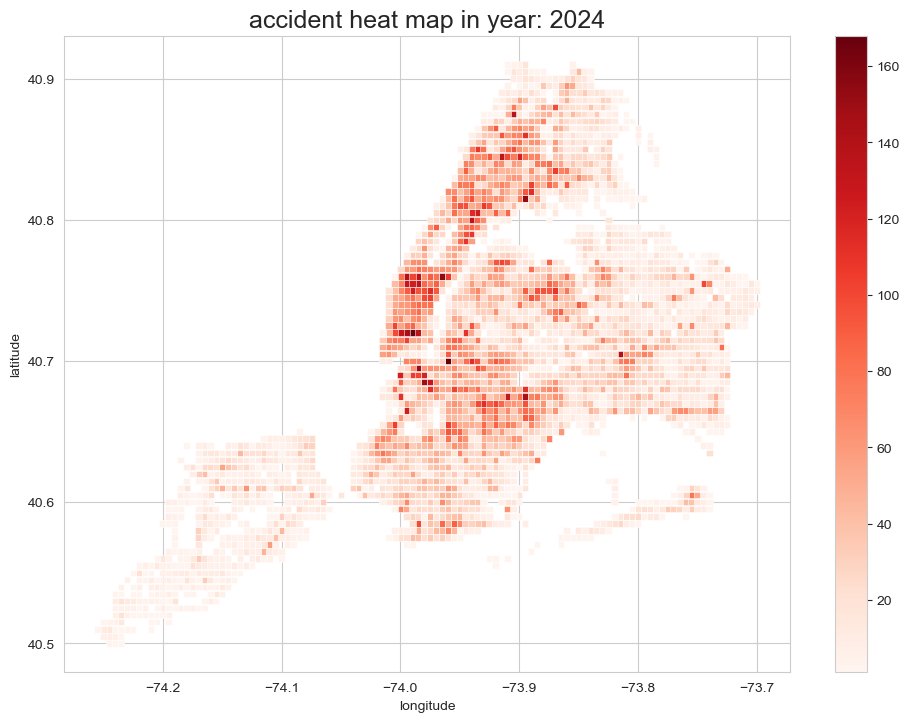

In [8]:
# all accidents
all_accidents = pd.DataFrame(table_accidents_year['LOCATION ROUNDED'].value_counts())
all_accidents['location'] = all_accidents.index
all_accidents[['latitude', 'longitude']] = all_accidents.location.str.split(' ', n= 1, expand=True)
all_accidents['latitude'] = all_accidents['latitude'].astype(float)
all_accidents['longitude'] = all_accidents['longitude'].astype(float)
all_accidents

sns.set_style("whitegrid")
norm = plt.Normalize(all_accidents['count'].min(), all_accidents['count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

fig, ax = plt.subplots()

fig = sns.scatterplot(data=all_accidents, x="longitude", y="latitude", s=22, hue='count', marker='s', palette='Reds')
fig.set_title("accident heat map in year: " + str(year), size=18)

# Remove the legend and add a colorbar
fig.get_legend().remove()
fig.figure.colorbar(sm, ax=ax)

### only bicycle accidents
#### single year

In [9]:
# only cyclists involved
table_accidents_bicycles_year = table_accidents[table_accidents["CRASH DATE"].dt.year == year]
table_accidents_bicycles_year = table_accidents_bicycles_year[table_accidents_bicycles_year['LATITUDE'] > 0]
table_accidents_bicycles_year = table_accidents_bicycles_year[(table_accidents_bicycles_year["NUMBER OF CYCLIST INJURED"] > 0) | (table_accidents_bicycles_year["NUMBER OF CYCLIST KILLED"] > 0)]

table_accidents_bicycles_year['LATITUDE ROUNDED'] = np.round(table_accidents_bicycles_year.LATITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
table_accidents_bicycles_year['LONGITUDE ROUNDED'] = np.round(table_accidents_bicycles_year.LONGITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
table_accidents_bicycles_year['LOCATION ROUNDED'] = table_accidents_bicycles_year['LATITUDE ROUNDED'].astype(str) + ' ' + table_accidents_bicycles_year['LONGITUDE ROUNDED'].astype(str) 

table_deaths_bicycles_year = table_accidents_bicycles_year[(table_accidents_bicycles_year["NUMBER OF CYCLIST KILLED"] > 0)]
table_deaths_bicycles_year['LONGITUDE'] = table_deaths_bicycles_year['LONGITUDE'].astype(float)
table_deaths_bicycles_year['LATITUDE'] = table_deaths_bicycles_year['LATITUDE'].astype(float)

table_accidents_bicycles_year
table_deaths_bicycles_year

C:\Users\tzach\AppData\Local\Temp\ipykernel_21304\3383760818.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_deaths_bicycles_year['LONGITUDE'] = table_deaths_bicycles_year['LONGITUDE'].astype(float)
C:\Users\tzach\AppData\Local\Temp\ipykernel_21304\3383760818.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_deaths_bicycles_year['LATITUDE'] = table_deaths_bicycles_year['LATITUDE'].astype(float)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LATITUDE ROUNDED,LONGITUDE ROUNDED,LOCATION ROUNDED
284966,2024-02-22,20:08,NaN,NaN,40.728520,-73.905730,"(40.72852, -73.90573)",MAURICE AVENUE,NaN,NaN,...,NaN,4705063,Box Truck,Bike,NaN,NaN,NaN,40.730,-73.905,40.73 -73.905
285103,2024-02-23,5:58,BRONX,10451.0,40.824190,-73.913850,"(40.82419, -73.91385)",MELROSE AVENUE,EAST 161 STREET,NaN,...,NaN,4705065,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN,40.825,-73.915,40.825 -73.915
291710,2024-02-27,7:52,BROOKLYN,11206.0,40.704113,-73.947860,"(40.704113, -73.94786)",BROADWAY,LORIMER STREET,NaN,...,NaN,4705579,Sedan,Sedan,Bike,NaN,NaN,40.705,-73.950,40.705 -73.95
303683,2024-03-11,16:09,BROOKLYN,11220.0,40.642097,-74.009870,"(40.642097, -74.00987)",6 AVENUE,53 STREET,NaN,...,NaN,4709147,E-Bike,NaN,NaN,NaN,NaN,40.640,-74.010,40.64 -74.01
309495,2024-03-18,6:03,NaN,NaN,40.808850,-73.954040,"(40.80885, -73.95404)",MANHATTAN AVENUE,NaN,NaN,...,NaN,4710999,Box Truck,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,40.810,-73.955,40.81 -73.955
310391,2024-05-22,9:10,BROOKLYN,11220.0,40.644790,-74.014330,"(40.64479, -74.01433)",4 AVENUE,53 STREET,NaN,...,NaN,4726906,Pick-up Truck,E-Bike,NaN,NaN,NaN,40.645,-74.015,40.645 -74.015
317057,2024-06-01,3:57,NaN,NaN,40.850906,-73.938290,"(40.850906, -73.93829)",WEST 181 STREET,NaN,NaN,...,NaN,4729767,Tractor Truck Diesel,E-Bike,NaN,NaN,NaN,40.850,-73.940,40.85 -73.94
320974,2024-04-18,15:30,BROOKLYN,11235.0,40.581960,-73.959946,"(40.58196, -73.959946)",NEPTUNE AVENUE,CONEY ISLAND AVENUE,NaN,...,NaN,4718424,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,40.580,-73.960,40.58 -73.96
321862,2024-03-13,14:29,BROOKLYN,11230.0,40.613070,-73.957954,"(40.61307, -73.957954)",NaN,NaN,1608 AVENUE O,...,NaN,4709603,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,40.615,-73.960,40.615 -73.96
322164,2024-06-07,14:05,MANHATTAN,10019.0,40.765880,-73.994640,"(40.76588, -73.99464)",11 AVENUE,WEST 50 STREET,NaN,...,NaN,4730846,Box Truck,E-Bike,NaN,NaN,NaN,40.765,-73.995,40.765 -73.995


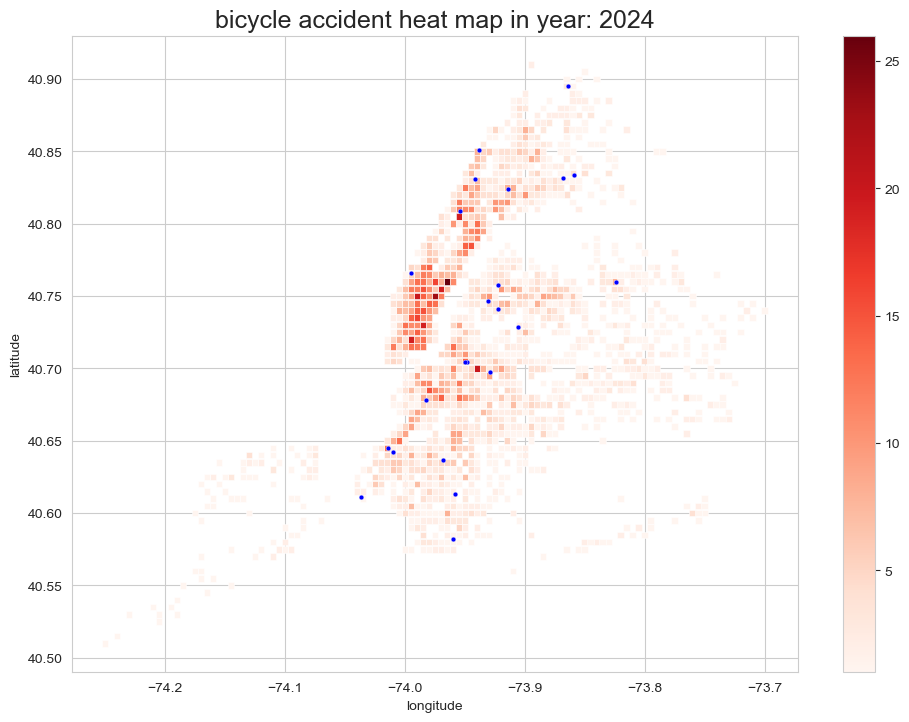

In [10]:
bicycle_accidents = pd.DataFrame(table_accidents_bicycles_year['LOCATION ROUNDED'].value_counts())
bicycle_accidents['location'] = bicycle_accidents.index
bicycle_accidents[['latitude', 'longitude']] = bicycle_accidents.location.str.split(' ', n= 1, expand=True)
bicycle_accidents['latitude'] = bicycle_accidents['latitude'].astype(float)
bicycle_accidents['longitude'] = bicycle_accidents['longitude'].astype(float)
bicycle_accidents

sns.set_style("whitegrid")
norm = plt.Normalize(bicycle_accidents['count'].min(), bicycle_accidents['count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

fig, ax = plt.subplots()

fig = sns.scatterplot(data=bicycle_accidents, x="longitude", y="latitude", s=22, hue='count', marker='s', palette='Reds')
fig.set_title("bicycle accident heat map in year: " + str(year), size=18)

# Remove the legend and add a colorbar
fig.get_legend().remove()
fig.figure.colorbar(sm, ax=ax)

fig = sns.scatterplot(data=table_deaths_bicycles_year, x="LONGITUDE", y="LATITUDE", color='blue', legend=False, s=12)

#### all years

In [12]:
# bicycles accident heatmap for all years
table_accidents_bicycles_allyears = table_accidents[table_accidents['LATITUDE'] > 0]
table_accidents_bicycles_allyears = table_accidents_bicycles_allyears[(table_accidents_bicycles_allyears["NUMBER OF CYCLIST INJURED"] > 0) | (table_accidents_bicycles_allyears["NUMBER OF CYCLIST KILLED"] > 0)]

table_accidents_bicycles_allyears['LATITUDE ROUNDED'] = np.round(table_accidents_bicycles_allyears.LATITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
table_accidents_bicycles_allyears['LONGITUDE ROUNDED'] = np.round(table_accidents_bicycles_allyears.LONGITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
table_accidents_bicycles_allyears['LOCATION ROUNDED'] = table_accidents_bicycles_allyears['LATITUDE ROUNDED'].astype(str) + ' ' + table_accidents_bicycles_allyears['LONGITUDE ROUNDED'].astype(str) 

table_deaths_bicycles_allyears = table_accidents_bicycles_allyears[(table_accidents_bicycles_allyears["NUMBER OF CYCLIST KILLED"] > 0)]
table_deaths_bicycles_allyears['LONGITUDE'] = table_deaths_bicycles_allyears['LONGITUDE'].astype(float)
table_deaths_bicycles_allyears['LATITUDE'] = table_deaths_bicycles_allyears['LATITUDE'].astype(float)

table_accidents_bicycles_allyears
table_deaths_bicycles_allyears

C:\Users\tzach\AppData\Local\Temp\ipykernel_21304\2423116744.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_deaths_bicycles_allyears['LONGITUDE'] = table_deaths_bicycles_allyears['LONGITUDE'].astype(float)
C:\Users\tzach\AppData\Local\Temp\ipykernel_21304\2423116744.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_deaths_bicycles_allyears['LATITUDE'] = table_deaths_bicycles_allyears['LATITUDE'].astype(float)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LATITUDE ROUNDED,LONGITUDE ROUNDED,LOCATION ROUNDED
1362,2021-07-08,22:03,MANHATTAN,10002.0,40.721474,-73.983830,"(40.721474, -73.98383)",EAST HOUSTON STREET,CLINTON STREET,NaN,...,NaN,4456653,Sedan,Bike,NaN,NaN,NaN,40.720,-73.985,40.72 -73.985
4398,2021-09-11,1:28,NaN,NaN,40.795990,-73.968960,"(40.79599, -73.96896)",AMSTERDAM AVENUE,NaN,NaN,...,NaN,4457900,E-Bike,NaN,NaN,NaN,NaN,40.795,-73.970,40.795 -73.97
15833,2022-06-29,23:54,BRONX,10455.0,40.814266,-73.912964,"(40.814266, -73.912964)",EAST 149 STREET,SAINT ANNS AVENUE,NaN,...,NaN,4542310,Sedan,E-Bike,NaN,NaN,NaN,40.815,-73.915,40.815 -73.915
19884,2021-09-25,22:26,BROOKLYN,11207.0,40.657530,-73.897970,"(40.65753, -73.89797)",SNEDIKER AVENUE,LINDEN BOULEVARD,NaN,...,NaN,4461286,E-Bike,NaN,NaN,NaN,NaN,40.660,-73.900,40.66 -73.9
25386,2021-12-24,9:21,MANHATTAN,10065.0,40.762802,-73.965675,"(40.762802, -73.965675)",EAST 61 STREET,3 AVENUE,NaN,...,NaN,4490224,Box Truck,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,40.765,-73.965,40.765 -73.965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151983,2023-06-04,19:28,MANHATTAN,10010.0,40.737545,-73.984090,"(40.737545, -73.98409)",3 AVENUE,EAST 21 STREET,NaN,...,NaN,4634861,Sedan,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,40.740,-73.985,40.74 -73.985
2151984,2023-09-13,3:05,QUEENS,11372.0,40.747856,-73.881905,"(40.747856, -73.881905)",NaN,NaN,84-07 ROOSEVELT AVENUE,...,NaN,4661989,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,40.750,-73.880,40.75 -73.88
2153433,2025-01-29,0:06,MANHATTAN,10037.0,40.816025,-73.939460,"(40.816025, -73.93946)",W 138 ST,LENOX AVE,NaN,...,NaN,4789910,Bus,E-Bike,NaN,NaN,NaN,40.815,-73.940,40.815 -73.94
2158515,2025-02-25,22:42,BRONX,10455.0,40.814938,-73.914955,"(40.814938, -73.914955)",BROOK AVE,E 149 ST,NaN,...,NaN,4795059,Bus,Bike,NaN,NaN,NaN,40.815,-73.915,40.815 -73.915


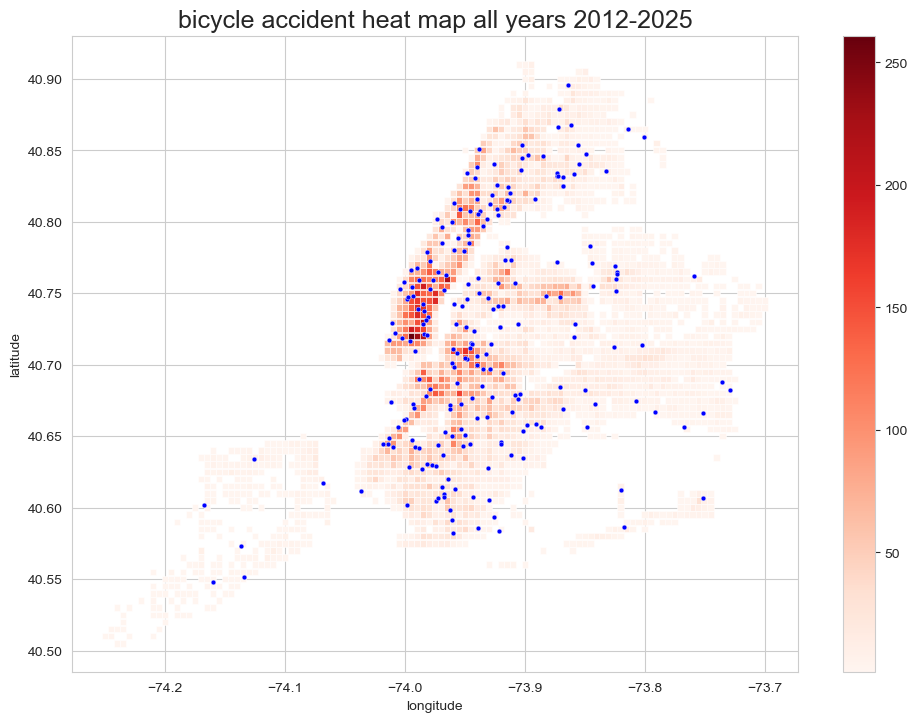

In [13]:
bicycle_accidents_all = pd.DataFrame(table_accidents_bicycles_allyears['LOCATION ROUNDED'].value_counts())
bicycle_accidents_all['location'] = bicycle_accidents_all.index
bicycle_accidents_all[['latitude', 'longitude']] = bicycle_accidents_all.location.str.split(' ', n= 1, expand=True)
bicycle_accidents_all['latitude'] = bicycle_accidents_all['latitude'].astype(float)
bicycle_accidents_all['longitude'] = bicycle_accidents_all['longitude'].astype(float)
bicycle_accidents_all

sns.set_style("whitegrid")
norm = plt.Normalize(bicycle_accidents_all['count'].min(), bicycle_accidents_all['count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

fig, ax = plt.subplots()

fig = sns.scatterplot(data=bicycle_accidents_all, x="longitude", y="latitude", s=22, hue='count', marker='s', palette='Reds')
fig.set_title("bicycle accident heat map all years 2012-2025", size=18)

# Remove the legend and add a colorbar
fig.get_legend().remove()
fig.figure.colorbar(sm, ax=ax)

fig = sns.scatterplot(data=table_deaths_bicycles_allyears, x="LONGITUDE", y="LATITUDE", color='blue', legend=False, s=12)

to compute real total probabilities of an accident when riding a bike, which would be needed for a risk map, one would need overall number of bike rides and estimate it. Not known from 2 tables...

to compute conditional probabilities of a bike crash, when riding a citibike, one would need to know which of the bike crashes in the NYPD table are citibikenyc crashes. Also not known. so 2 tables cannot be consistently mapped onto each other.

strategy for accident/health insurance:\
As data shows there are many yearly citibike rides and thus it is a considerable market for insurance companies. One could take the bicycles accident map as a risk map and push for a included insurance with citibikenyc members for example. One could couple fees of course with number of trips/time spent on bike, so that it would be rather modest.\
Assuming the bike rental company allows the data to be shared (about the trips), the individual members can be grouped into different risk groups based on which areas they cover with their trips/commutes. If the customer doesn´t allow the data to be shared, group in high risk group to give incentive to share data (assuming this is legal in the US, in Europe due to its data privacy laws it would probably be not). It would also cover insurance only with use of helmet to prevent bad head injuries.\
Incentivize usage of dedicated bike ways/paths (e.g. in insurance rates) to lower risk of car collisions.\
Health Insurance would also love to see people doing sports, as obesity is a very common health risk in the US and riding bikes would be very good to counter that (in nprinciple), although people in large cities are probably already more health-aware than people on the countryside.\
\
CitibikeNYC strategy:\
It would want people to be insured, without probably providing the logistics of the service itself (otherwise it would do it already now). Bad for PR if people are not insured, see (https://observer.com/2013/07/citi-bike-floods-streets-with-thousands-of-uninsured-cyclists/), but also high legal risks in sueing-prone US (see https://www.edelmanpclaw.com/bicycle-injuries/citi-bike-injuries/). But given the increasing number of accidents the PR issue becomes worse.\
It would want to couple insurance with usage of helmet, as bad injuries occur when riding without helmet. And bad injuries are very bad for PR/legal expenses. It would also want people to have their bike trips on more safe dedicated bike paths/ways.\
Given large percentage of commuters that use citibikenyc, one could also push for extra provisions in insurances for commute on bikes in health insurances (that are usually coupled with jobs). Trips are usually not so long and overall risk is not so high.\
\
In total insurance would probably help that people wear helmets, as it is not mandatory (only for minors below 14 years and in some regions perhaps). It would also help citibikenyc with bad PR and some legal expenses due to being sued. But probably for them currently it is still cheaper to pay legal expenses that to provide the extra service of insurance.